# E-commerce data EDA for Customer Behavior Analysis

EDA (Exploratory Data Analysis) of E-Commerce data will help us understand the data and think of ways to use it to understand the customer behavior.

## 1. Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For Association Rule Mining
#from mlxtend.frequent_patterns import apriori, association_rules

## 2. Load Data

In [3]:
# Import necessary packages
import pandas as pd
data = pd.read_csv('Customer_Behavior_Data.csv', delimiter=';') 

# Display the first few rows of the DataFrame to verify the data
data.head(10)



,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
5,118,510,3918027,yes,no,0,223,38,19,98,221,101,"203,9",118,"9,18","6,3",6,"1,7",0,0
6,121,510,3559993,no,yes,24,218,37,30,88,349,108,"212,6",118,"9,57","7,5",7,"2,03",3,0
7,147,415,3299001,yes,no,0,157,27,9,79,103,94,"211,8",96,"9,53","7,1",6,"1,92",0,0
8,117,408,3354719,no,no,0,185,31,30,97,352,80,"215,8",90,"9,71","8,7",4,"2,35",1,0
9,141,415,3308173,yes,yes,37,259,44,19,84,222,111,"326,4",97,"14,69","11,2",5,"3,02",0,0


## EDA

With every new dataset we need to got throuhg an EDA (Exploratory Data Analysis) process. It's a good idea to have a basic framework in mind for our EDAs. It is always a good idea to: 

- Understand what our columns say
- Rename columns labels and make them lowercase
- Make sure that the data types of columns are correct
- Handle missing values
- Check for duplicates
- Search for outliers
- Check for linearity between variables

To achieve this we can take advantage of Pandas and visualisation libraries

* Column names are standardized to lowercase with underscores for ease of use.

In [4]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head(10)

,account_length,location_code,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
5,118,510,3918027,yes,no,0,223,38,19,98,221,101,"203,9",118,"9,18","6,3",6,"1,7",0,0
6,121,510,3559993,no,yes,24,218,37,30,88,349,108,"212,6",118,"9,57","7,5",7,"2,03",3,0
7,147,415,3299001,yes,no,0,157,27,9,79,103,94,"211,8",96,"9,53","7,1",6,"1,92",0,0
8,117,408,3354719,no,no,0,185,31,30,97,352,80,"215,8",90,"9,71","8,7",4,"2,35",1,0
9,141,415,3308173,yes,yes,37,259,44,19,84,222,111,"326,4",97,"14,69","11,2",5,"3,02",0,0


In [5]:

data = data.apply(lambda x: x.str.replace(',', '.') if x.dtype == "object" else x)
data.head(10)


,account_length,location_code,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,244.7,91,11.01,10,3,2.7,1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.7,1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0
5,118,510,3918027,yes,no,0,223,38,19,98,221,101,203.9,118,9.18,6.3,6,1.7,0,0
6,121,510,3559993,no,yes,24,218,37,30,88,349,108,212.6,118,9.57,7.5,7,2.03,3,0
7,147,415,3299001,yes,no,0,157,27,9,79,103,94,211.8,96,9.53,7.1,6,1.92,0,0
8,117,408,3354719,no,no,0,185,31,30,97,352,80,215.8,90,9.71,8.7,4,2.35,1,0
9,141,415,3308173,yes,yes,37,259,44,19,84,222,111,326.4,97,14.69,11.2,5,3.02,0,0


* Reviewing data types below which ensures correct handling of categorical (e.g., credit_card_info_save, push_status) and numerical columns.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account_length                       3333 non-null   int64 
 1   location_code                        3333 non-null   int64 
 2   user_id                              3333 non-null   int64 
 3   credit_card_info_save                3333 non-null   object
 4   push_status                          3333 non-null   object
 5   add_to_wishlist                      3333 non-null   int64 
 6   desktop_sessions                     3333 non-null   int64 
 7   app_sessions                         3333 non-null   int64 
 8   desktop_transactions                 3333 non-null   int64 
 9   total_product_detail_views           3333 non-null   int64 
 10  session_duration                     3333 non-null   int64 
 11  promotion_clicks                     3333 n

* Replace 'no' with 0 and 'yes' with 1 in the specified columns (push_status , credit_card_info_save)

In [7]:
# Replace 'no' with 0 and 'yes' with 1 in the specified columns
data['credit_card_info_save'] = data['credit_card_info_save'].replace({'no': 0, 'yes': 1})
data['push_status'] = data['push_status'].replace({'no': 0, 'yes': 1})

# Convert object columns to float
data = data.apply(lambda x: x.astype(float) if x.dtype == "object" else x)


data.head(5)

C:\Users\syedr\AppData\Local\Temp\ipykernel_41216\1909237936.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['credit_card_info_save'] = data['credit_card_info_save'].replace({'no': 0, 'yes': 1})
C:\Users\syedr\AppData\Local\Temp\ipykernel_41216\1909237936.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['push_status'] = data['push_status'].replace({'no': 0, 'yes': 1})


,account_length,location_code,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
0,128,415,3824657,0,1,25,265,45,17,110,197,87,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,3717191,0,1,26,162,27,17,123,196,103,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,3581921,0,0,0,243,41,10,114,121,110,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,3759999,1,0,0,299,51,5,71,62,88,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,3306626,1,0,0,167,28,13,113,148,122,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account_length                       3333 non-null   int64  
 1   location_code                        3333 non-null   int64  
 2   user_id                              3333 non-null   int64  
 3   credit_card_info_save                3333 non-null   int64  
 4   push_status                          3333 non-null   int64  
 5   add_to_wishlist                      3333 non-null   int64  
 6   desktop_sessions                     3333 non-null   int64  
 7   app_sessions                         3333 non-null   int64  
 8   desktop_transactions                 3333 non-null   int64  
 9   total_product_detail_views           3333 non-null   int64  
 10  session_duration                     3333 non-null   int64  
 11  promotion_clicks              

##### Lets begin searching for outliers using IQR Method

In [9]:
# Selecting only numeric columns when calculating the IQR and searching for outliers
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).sum()
print(f"Number of outliers per column: \n{outliers}")



Number of outliers per column: 
account_length                          18
location_code                            0
user_id                                  0
credit_card_info_save                  323
push_status                              0
add_to_wishlist                          1
desktop_sessions                        27
app_sessions                            17
desktop_transactions                    15
total_product_detail_views              23
session_duration                        25
promotion_clicks                        20
avg_order_value                         30
sale_product_views                      22
discount_rate_per_visited_products      30
product_detail_view_per_app_session     46
app_transactions                        78
add_to_cart_per_session                 49
customer_service_calls                 267
churn                                  483
dtype: int64


## Statistical Analysis

Are there missing values in the data? (see .info() results) so we can move on and check our descriptive statistics with the .describe() function. 

## 3. Handle Missing Values

Missing values can be an issue with most real-life datasets. We can use the .info() function, there are no missing values. For the sake of double checking and to show a way of checking whether the dataset has missing values, let's write some code below

In [10]:
#Checking the missing values in each column
missing_data = data.isnull().sum()
print(f"Missing values in each column: \n{missing_data}")


Missing values in each column: 
account_length                         0
location_code                          0
user_id                                0
credit_card_info_save                  0
push_status                            0
add_to_wishlist                        0
desktop_sessions                       0
app_sessions                           0
desktop_transactions                   0
total_product_detail_views             0
session_duration                       0
promotion_clicks                       0
avg_order_value                        0
sale_product_views                     0
discount_rate_per_visited_products     0
product_detail_view_per_app_session    0
app_transactions                       0
add_to_cart_per_session                0
customer_service_calls                 0
churn                                  0
dtype: int64


* The dataset contains no missing values, so imputation is not required.

## 4. Check for duplicates

Another common issue with data is duplicated records. We need to make sure to always check for duplicates

In [11]:
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


* No duplicate rows were found, so no action is necessary

## 5. Search for outliers

- Outliers are data points at the extreme points of a dataset. 
- Some outliers represent true values from natural variation in the population and some occur because of dirty or incorect data.
    - Because of this, we need to be careful when we cleanse our data
    - If the outliers are True outliers, we should probably keep them in our data since they represent natural variations in our sample
    - If the outliers are errors we should generally remove those data points
    
We've already identified some potential outliers from our .describe() function with session durations, average order value, promotion clicks, sale product views, app transactions, account length, add to wish list, desktop sessions, and customer service calls.

To identify our outliers we can use: 
- Visualisations such as histograms and blox plots 
- Use interquartiles with rules such as:
    - outlier < Q1 - 1.5(IQR)
    - outlier > Q3 + 1.5(IQR)

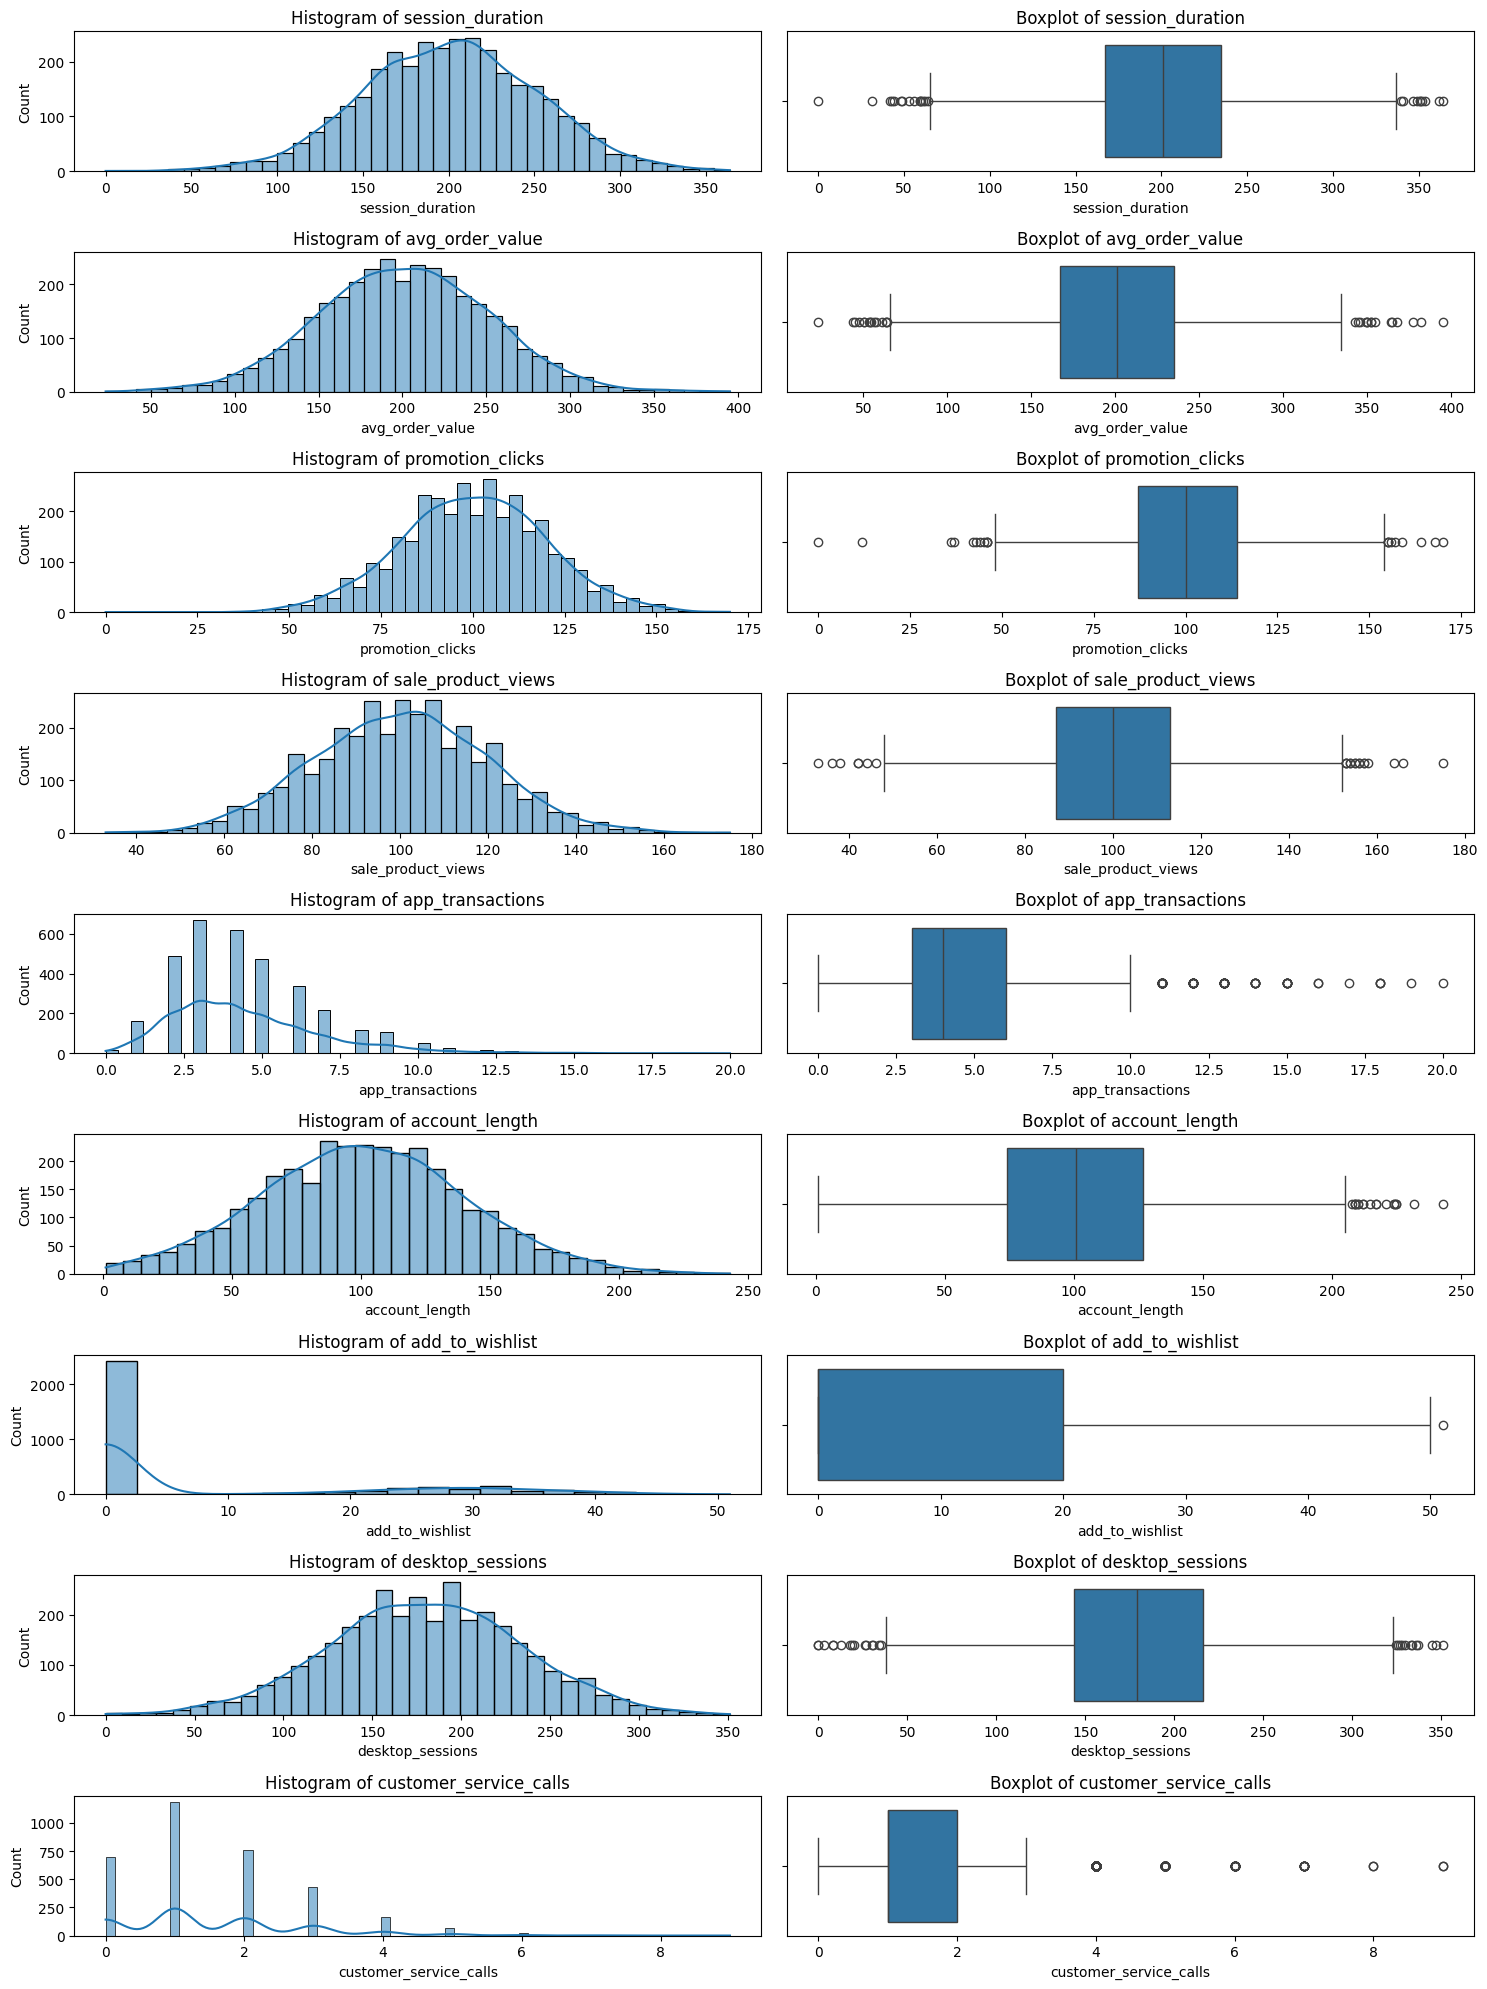

Column: session_duration
Number of outliers: 25
Column: avg_order_value
Number of outliers: 30
Column: promotion_clicks
Number of outliers: 20
Column: sale_product_views
Number of outliers: 22
Column: app_transactions
Number of outliers: 78
Column: account_length
Number of outliers: 18
Column: add_to_wishlist
Number of outliers: 1
Column: desktop_sessions
Number of outliers: 27
Column: customer_service_calls
Number of outliers: 267


In [12]:
# Visualize data using histograms and box plots

# Columns to analyze for outliers based on the description
# Ensure that we are only working with numeric columns
columns_to_analyze = ['session_duration', 'avg_order_value', 'promotion_clicks', 
                      'sale_product_views', 'app_transactions', 'account_length', 
                      'add_to_wishlist', 'desktop_sessions', 'customer_service_calls']

# Plot histograms and boxplots for numeric columns only
plt.figure(figsize=(15, 20))
for i, col in enumerate(columns_to_analyze, 1):
    plt.subplot(len(columns_to_analyze), 2, 2*i-1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(len(columns_to_analyze), 2, 2*i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

# Identify outliers using the IQR method

# Calculate Q1, Q3, and IQR for numeric columns
for col in columns_to_analyze:
    if pd.api.types.is_numeric_dtype(data[col]):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"Column: {col}")
        print(f"Number of outliers: {outliers.shape[0]}")
    



* The column customer_service_calls has the highest number of outliers, which may indicate some unusual customer behavior or errors in data collection.
* Other columns such as promotion_clicks and desktop_sessions also have a moderate number of outliers, likely reflecting highly engaged users.
* The column add_to_wishlist has only 1 outlier, making it less of a concern.

### Based on the outlier counts and the nature of the data, we are performing the below tasks

*Keep Outliers for Key Behavioral Metrics:*

Customer Service Calls: Outliers in this column may represent dissatisfied or highly engaged customers, and removing them could result in loss of valuable information. Since these behaviors are important for understanding churn, we decided to keep these outliers.

*Review and Possibly Cap Outliers for Engagement Columns:*

Columns like Session Duration, App Transactions, Desktop Sessions, and Sale Product Views may reflect highly engaged users. While they might represent true variations, extreme values can skew the analysis. Instead of removing them, we have decided to consider capping the outliers to the 95th percentile to limit their influence while retaining the important information.

*Remove Outliers for Account-Related Columns:*

For columns such as Account Length and Add to Wishlist, the outliers might not provide as much business value and could distort the analysis. These columns could benefit from removing the extreme outliers.

In [13]:
# Step 3: Handling Outliers

# Columns to cap or remove outliers
columns_to_cap = ['session_duration', 'promotion_clicks', 'sale_product_views', 
                  'app_transactions', 'desktop_sessions']
columns_to_remove = ['account_length', 'add_to_wishlist']

# Cap outliers in key engagement-related columns at the 95th percentile
for col in columns_to_cap:
    upper_bound = data[col].quantile(0.95)
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Remove outliers from account-related columns using IQR
for col in columns_to_remove:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers
    data = data[~((data[col] < lower_bound) | (data[col] > upper_bound))]

# Final dataset shape after handling outliers
print(f"Data shape after handling outliers: {data.shape}")


Data shape after handling outliers: (3314, 20)


Insights:

*Capping for Engagement Metrics:* 

By capping the extreme values for highly engaged users (e.g., session duration, app transactions), we limit their influence on model training or analysis without discarding potentially useful data. This is crucial in e-commerce data, where highly engaged users are often outliers by nature.

*Removing Outliers for Non-Engagement Metrics:* 

For columns like account_length and add_to_wishlist, outliers could distort summary statistics or model training, so it makes sense to remove them.

### 6. Repeat with the rest of the variables

This is EDA, so we are going to visualize all the variables we identified as having potentail outliers

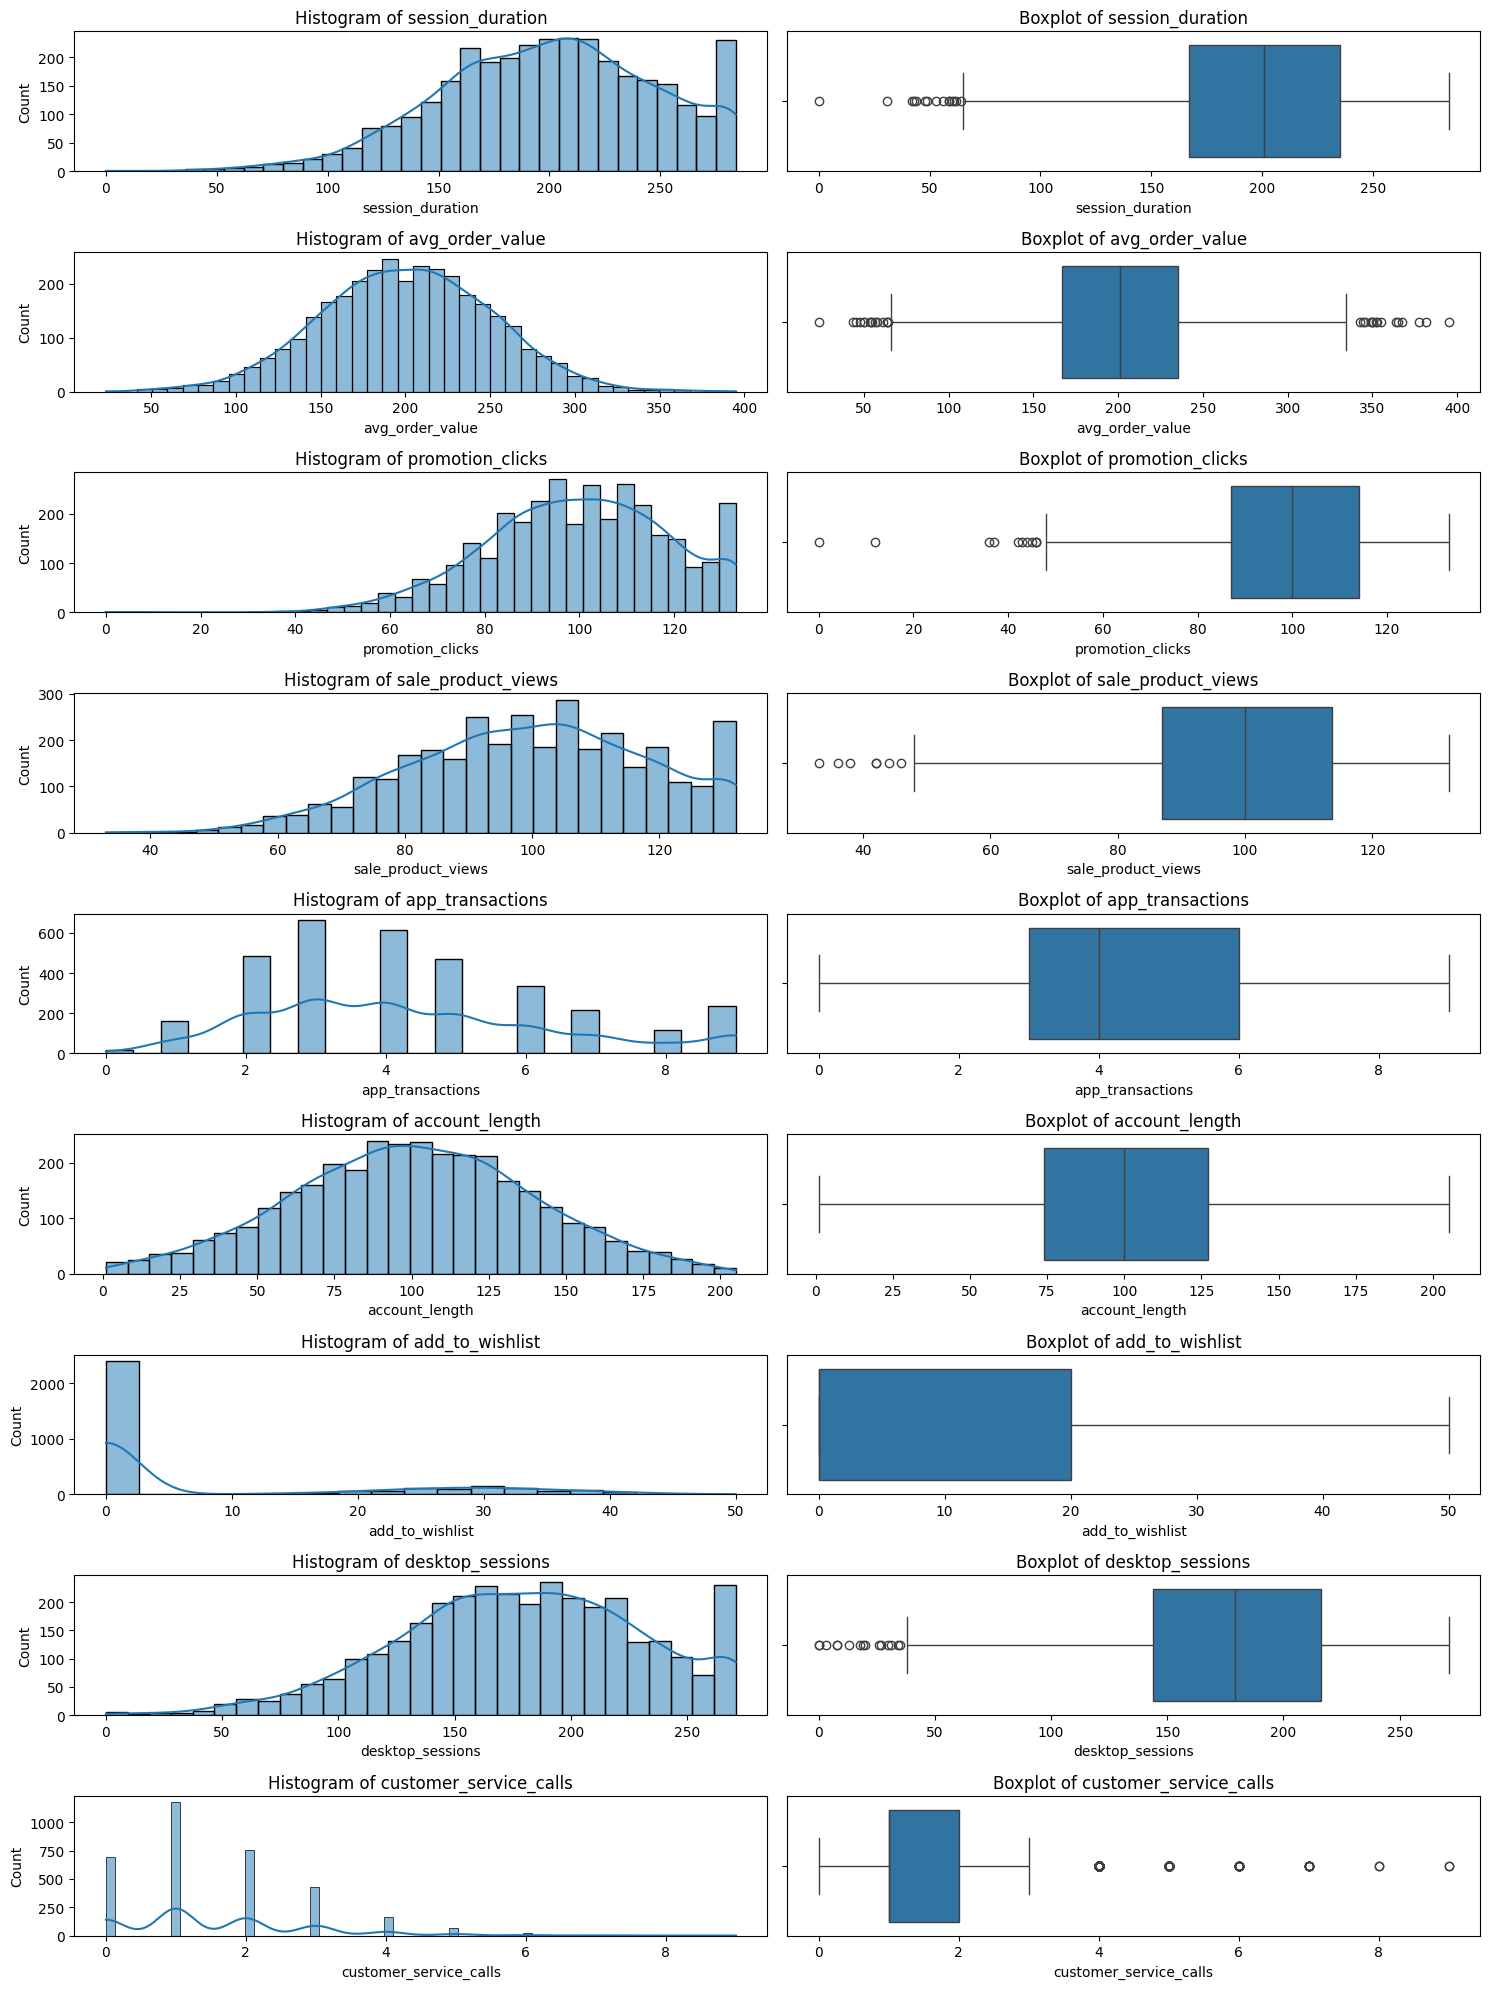

Column: session_duration
Number of outliers: 15
Column: avg_order_value
Number of outliers: 30
Column: promotion_clicks
Number of outliers: 11
Column: sale_product_views
Number of outliers: 7
Column: app_transactions
Number of outliers: 0
Column: account_length
Number of outliers: 0
Column: add_to_wishlist
Number of outliers: 0
Column: desktop_sessions
Number of outliers: 15
Column: customer_service_calls
Number of outliers: 266


In [14]:
# Step 4: Visualize all remaining variables identified as having potential outliers

# Remaining columns to visualize for outliers
remaining_columns = ['session_duration', 'avg_order_value', 'promotion_clicks', 
                     'sale_product_views', 'app_transactions', 'account_length', 
                     'add_to_wishlist', 'desktop_sessions', 'customer_service_calls']

# Plot histograms and box plots for all remaining columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(remaining_columns, 1):
    plt.subplot(len(remaining_columns), 2, 2*i-1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(len(remaining_columns), 2, 2*i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

# Step 5: Identify outliers for all remaining variables using IQR method

# Calculate Q1, Q3, and IQR for each of the remaining columns
for col in remaining_columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1  # Corrected the typo here
        
        # Determine outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"Column: {col}")
        print(f"Number of outliers: {outliers.shape[0]}")


Key Differences:

1. *Reduction in Outliers for Engagement Metrics:*

    Session Duration: Reduced from 25 to 15 outliers after capping.

    Promotion Clicks: Reduced from 20 to 11 outliers.

    Sale Product Views: Reduced from 22 to 7 outliers.
    
    Desktop Sessions: Reduced from 27 to 15 outliers.
    
    This shows that capping the outliers helped reduce the extreme values, leading to fewer outliers in these metrics.


2. *Complete Removal of Outliers for Non-Engagement Columns:*

    App Transactions: All 78 outliers were removed or capped down to 0.

    Account Length and Add to Wishlist: These outliers were also completely removed, going from 18 and 1 outliers, respectively, to 0.
    

3. *Customer Service Calls Remains Unchanged:*

    The number of outliers in Customer Service Calls remains nearly the same (266 outliers vs. 267 originally). Since this metric is important for understanding customer behavior, no capping or removal was done.

By capping and removing the outliers, we’ve:

Reduced noise from extreme values in engagement metrics, which can help improve model performance and accuracy.
Kept important behavioral data related to customer service calls, ensuring we retain insights into customer dissatisfaction.

# 7. Conclusions based on visualisations

- All of the numerical variables in the dataset has outliers from a statistical point of view. What is apparent is that all of the outliers represent natural variations as in e-commerce we expect such variations, making the outliers **"True outliers"**.
- If we had Outliers that we believe them to be data errors we could always use techniques such as removing all data points that are < Q1 - 1.5(IQR) and > Q3 +1.5(IQR) or removing data points that are 3 standard deviations below or above mean (example code below if you need to use it)

Presence of Outliers:

All of the numerical variables in the dataset have statistical outliers. These outliers are to be expected in e-commerce data, where customer behavior naturally varies significantly based on individual preferences and usage patterns.


True Outliers:

Most of the outliers identified during the analysis represent natural variations in the data, particularly in engagement-related metrics such as session_duration, promotion_clicks, sale_product_views, and desktop_sessions. These are true outliers, as they reflect genuine customer behavior (e.g., highly engaged users).


Capping Outliers:

For the engagement metrics, outliers were capped to the 95th percentile. This helped reduce the influence of extreme values while retaining key behavioral insights. Metrics like session duration and promotion clicks were capped to avoid skewing the results due to heavy users.


Removal of Outliers in Non-Engagement Metrics:

In columns such as account_length and add_to_wishlist, outliers were removed entirely. These outliers did not provide significant value and could distort the analysis, so their removal resulted in a cleaner dataset.


Customer Service Calls:

The outliers in the customer_service_calls column represent important customer dissatisfaction signals. Given the nature of this metric, it was important to keep these outliers for analysis, as they are likely to provide valuable insights into customer churn and overall dissatisfaction.


Techniques for Handling Data Errors:

If we had identified any erroneous outliers (e.g., due to data entry mistakes or system errors), we could have applied techniques such as:
Removing all data points that are below 
𝑄
1
−
1.5
×
IQR
Q1−1.5×IQR or above 
𝑄
3
+
1.5
×
IQR
Q3+1.5×IQR, as done for columns like account_length.
Alternatively, data points falling 3 standard deviations below or above the mean could have been removed.

#### Conclusion Summary:

In this dataset, most of the outliers represent natural variations typical in e-commerce, indicating that they are true outliers. Engagement-related metrics often contain users with extreme behavior (heavy users), and those outliers were capped rather than removed. For other non-engagement metrics, such as account_length, the outliers were removed to ensure a cleaner analysis. The outliers in customer service calls were retained due to their importance in understanding customer dissatisfaction.

    # 8. Analysis of the Dependent variable (Churn) vs Idependent variables

    Until now we've looked into the numeric variables, their missing data, duplicates, distribution, and outliers. A key part of the customer behaviour data is to understand which "behaviours" aka idependent varialbes in our dataset can help us predict customers deciding to stop using the product, aka "churn".

    Another variable that we haven't analysed yet is the location code, but we might be able to find value in comparing it with the churn and finding out any potential correlations.

Churn Distribution (%):
churn
0    85.576343
1    14.423657
Name: proportion, dtype: float64

Summary Statistics for Churned vs Non-Churned Customers:
       account_length  desktop_sessions  app_sessions  desktop_transactions  \
churn                                                                         
0          100.237659        174.955924     29.794781             16.929126   
1          101.483264        201.673640     35.138075             18.035565   

       session_duration  promotion_clicks  avg_order_value  \
churn                                                        
0            198.262341         99.659027       200.007828   
1            210.313808        100.123431       205.279498   

       customer_service_calls  
churn                          
0                    1.449577  
1                    2.236402  

Churn Rate by Location Code (%):
location_code
408    14.610778
415    14.216282
510    14.645858
Name: churn, dtype: float64


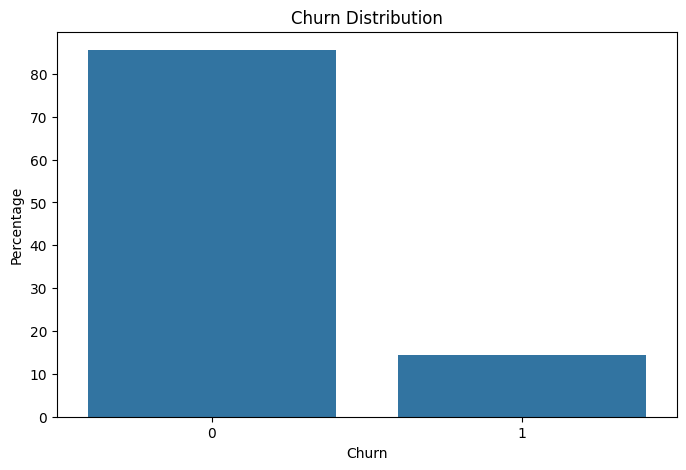

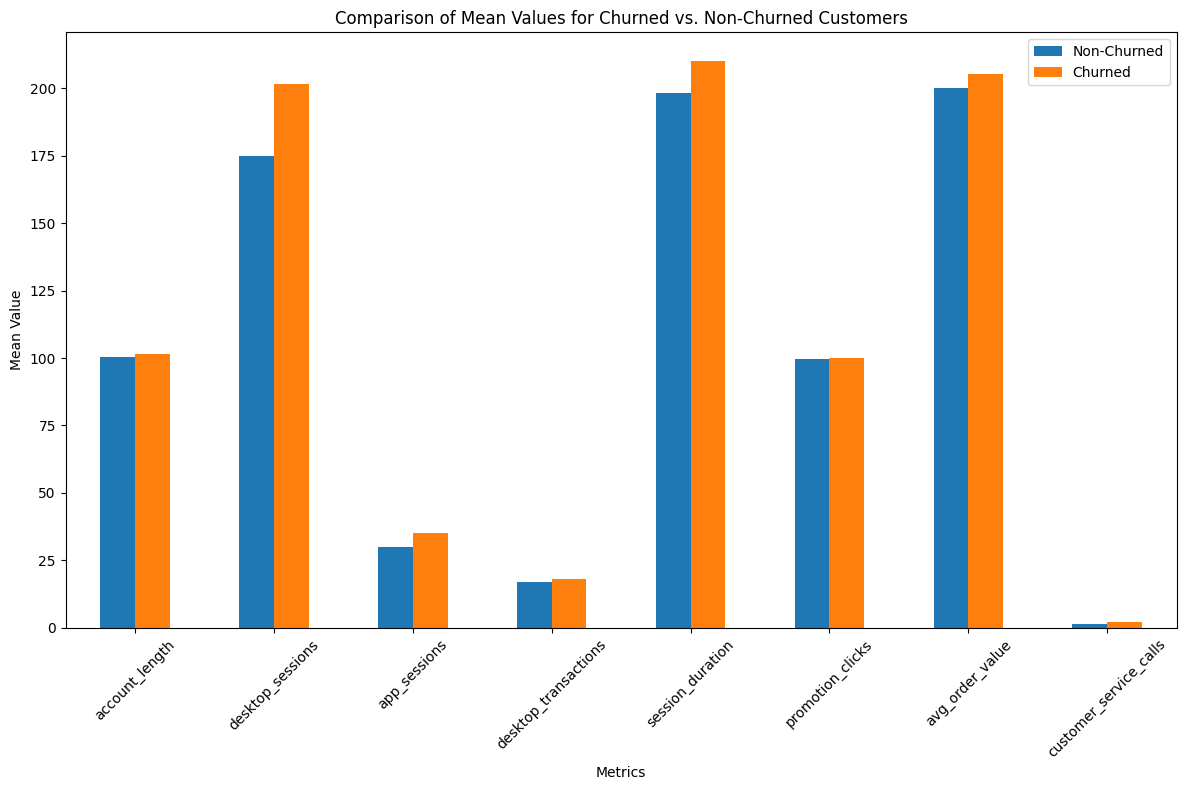

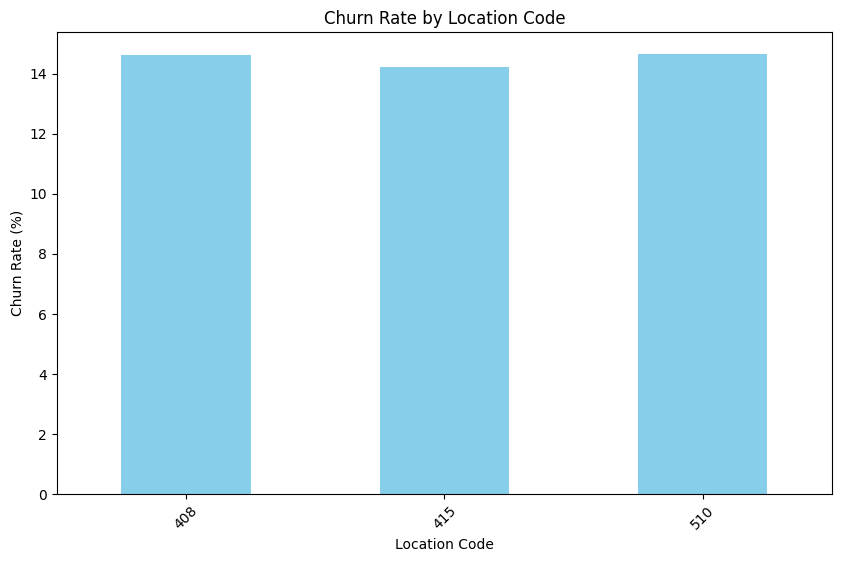

In [36]:
# Step 1: Analyze the distribution of the 'churn' variable
churn_distribution = data['churn'].value_counts(normalize=True) * 100
print("Churn Distribution (%):")
print(churn_distribution)

# Step 2: Convert numerical columns with commas to float values, if they are not already numeric
numeric_columns_with_commas = [
    'avg_order_value', 'discount_rate_per_visited_products',
    'product_detail_view_per_app_session', 'add_to_cart_per_session'
]
for col in numeric_columns_with_commas:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '.').astype(float)

# Step 3: Generate summary statistics for churned vs non-churned customers
churned_summary = data.groupby('churn').agg({
    'account_length': 'mean',
    'desktop_sessions': 'mean',
    'app_sessions': 'mean',
    'desktop_transactions': 'mean',
    'session_duration': 'mean',
    'promotion_clicks': 'mean',
    'avg_order_value': 'mean',
    'customer_service_calls': 'mean'
})

print("\nSummary Statistics for Churned vs Non-Churned Customers:")
print(churned_summary)

# Step 4: Analyze the relationship between location code and churn
location_churn = data.groupby('location_code')['churn'].mean() * 100

print("\nChurn Rate by Location Code (%):")
print(location_churn.head())

# Step 5: Plotting the relationships
import matplotlib.pyplot as plt
import seaborn as sns

# Churn distribution plot
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_distribution.index, y=churn_distribution.values)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.show()

# Plotting the summary statistics for churned vs. non-churned
churned_summary.T.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Mean Values for Churned vs. Non-Churned Customers')
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(['Non-Churned', 'Churned'])
plt.tight_layout()
plt.show()

# Location code vs. churn plot
plt.figure(figsize=(10, 6))
location_churn.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Location Code')
plt.xlabel('Location Code')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()


1. Churn Distribution:

    Approximately 14.4% of customers churned, while 85.6% remained. This indicates that the dataset is imbalanced, with a significantly higher proportion of non-churned customers. The imbalance suggests the need for careful handling during predictive modeling (e.g., using resampling techniques or adjusting class weights).

2. Comparison of Churned vs. Non-Churned Customers:

    Account Length: Churned customers had a slightly longer average account length compared to non-churned customers. This indicates that churn is not limited to new users and can occur even among longer-term customers.

    Desktop and App Sessions: Churned customers had higher engagement, with more desktop sessions and app sessions on average. This could imply that higher activity does not necessarily correlate with retention and may indicate frustration or unmet expectations leading to churn.
    
    Desktop Transactions and Session Duration: Both metrics were higher for churned customers, with churned customers spending more time on the platform and conducting more transactions. This suggests that more engaged customers may still churn, possibly due to specific negative experiences or other factors.

    Promotion Clicks: The difference in average promotion clicks between churned and non-churned customers was minimal, indicating that promotional activity may not be a strong factor influencing churn.

    Average Order Value: Churned customers had a slightly higher average order value, suggesting that higher spenders are not immune to churn.

    Customer Service Calls: There was a notable difference, with churned customers making more customer service calls. This could indicate that customers who experience issues requiring support are at a higher risk of churn, pointing to customer service as a potential area for improvement to reduce churn.

3. Churn Rate by Location Code:

    The churn rates across different location codes (408, 415, and 510) were close, ranging from 14.2% to 14.6%. The small differences suggest that geographic location, as represented by these codes, may not be a significant factor in predicting churn.
    
Summary:

The analysis indicates that churn is influenced more by customer engagement and interactions, such as session frequency, transaction volume, and customer service calls, rather than geographic factors or promotional activity. To reduce churn, focusing on enhancing customer support, addressing pain points, and understanding the needs of highly engaged users may be beneficial. Additionally, given the dataset's imbalance, future predictive modeling should address this to improve churn prediction accuracy.

# 9. Plot Churn against the categorical data

# 9.1 Observations from the categorical columns plots

- Majority of customers are in location code 415
- Majority of customers don't store their credit card information on the side
- Majority of customers don't allow push notifications

# 9.2 Plot categorical data against the Churn

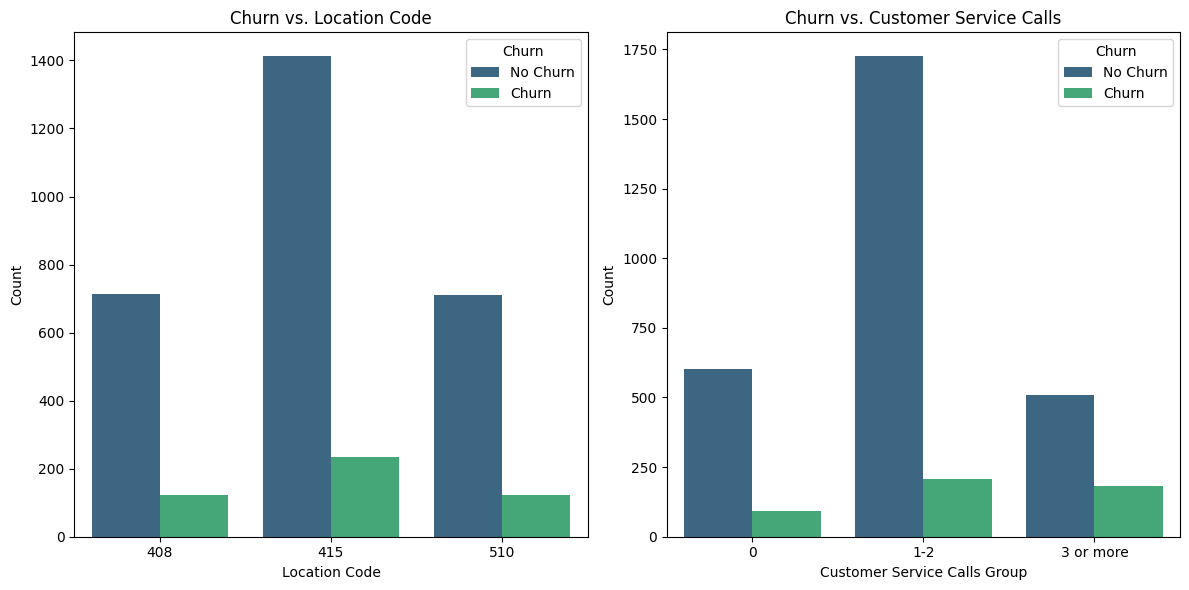

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Categorize customer service calls into ranges
data['customer_service_calls_group'] = pd.cut(
    data['customer_service_calls'], 
    bins=[-1, 0, 2, float('inf')], 
    labels=['0', '1-2', '3 or more']
)

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Plot 1: Churn vs. Location Code
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='location_code', hue='churn', palette='viridis')
plt.title('Churn vs. Location Code')
plt.xlabel('Location Code')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])

# Plot 2: Churn vs. Customer Service Calls
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='customer_service_calls_group', hue='churn', palette='viridis')
plt.title('Churn vs. Customer Service Calls')
plt.xlabel('Customer Service Calls Group')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])

# Adjust layout for better readability
plt.tight_layout()
plt.show()


# 9.3 Observations from plotting categorical data against Churn

- The location codes have a similar percentage of churns, meaning that location might not be a strong indication for churn
- Customers with push status activated are less likely to be churns, meaning that motivating customers to activate push status might help minimize churns
- Customers with their credit card information saved on the side are far less likely to be churns than customers without their credit card info saved. This means that if the shop motivates people to save their credit card info might minimize churns. 
    - This makes sense since customers who trust their credit card info on a side indicate that they trust the brand. More trust less chances of customers leaving your business.

Location Code:

    The churn rates are similar across different location codes, indicating that geographic location might not significantly influence churn. This suggests that other factors are more critical in determining customer retention.

Customer Service Calls:

    Customers who made more calls (e.g., "3 or more") tend to have higher churn rates, suggesting that frequent customer service interactions may indicate dissatisfaction or unresolved issues. Reducing the number of customer service calls through improved service quality or proactive support could help decrease churn.


Summary:

    This analysis highlights that while location may not play a significant role in predicting churn, customer service interactions can be a strong indicator. Identifying customers who frequently contact support and addressing their issues effectively may help reduce churn.